In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import numpy as np

In [2]:
# !pip install plotly
import plotly.offline as po
import matplotlib.pyplot as plt

#### Just check out this for plotly graph library: https://plotly.com/python/

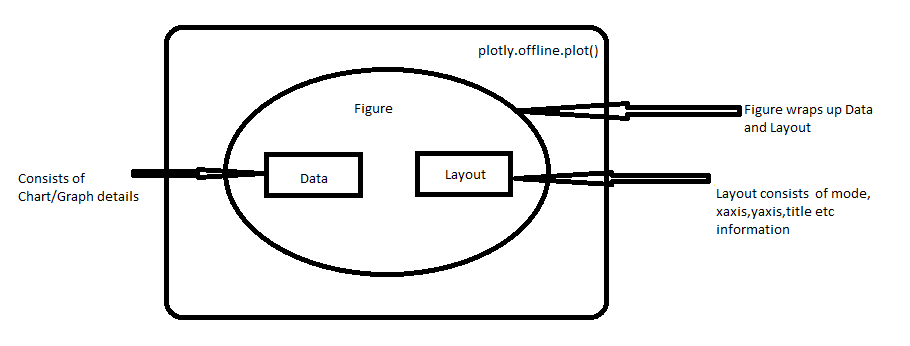

In [29]:
from IPython.display import Image
Image(filename='plotly.jpg')

#### How to use po.plot()
     1. Use data and layout seperately and then define figure as a combination of data and layout and pass it on to the po.plot() function
     
     2. We can us plotly.express as px and define figures and directly pass it to this function.
     
     3. We can define the figure by using plotly.graph_objs or plotly.graph_objects with data options and then use fig.update_layout function to add layout for the figure. This method is similar to option 1, difference being data and layout are seperately defined and then combined in option 1, whereas layout is updated using a fucntion of a figure defined.
     
     Note :  We can plot graphs using matplotlib.pyplot and seaborn packages as well but they do not provide any interactivity and dynamic updation as opposed to the plotly.offline graphs.
     

In [3]:
orders = pd.read_excel('Sample-Superstore.xls')
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print(orders.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


#### matplotlib.pyplot.plot() : non-interactive static  chart :

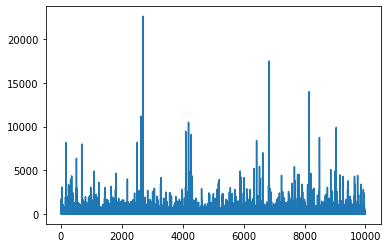

In [5]:
plt.plot(orders.Sales)
plt.show()

#### plotly.offline->pyo.plot(): Interactive Charts :

In [6]:
# Argument->List->multiple parameter as dictionary
po.plot([{
    'x': orders.index,
    'y': orders.Sales
}])

'temp-plot.html'

In [7]:
orders_sf=orders[['Sales','Profit']]

In [8]:
orders_sf.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [9]:
po.plot([{
    'x' : orders_sf.index,
    'y' : orders_sf[col],
    'name': col
    
}
    for col in orders_sf.columns
],filename='simple-scatter.html')

'simple-scatter.html'

In [10]:
import plotly.graph_objs as go

#### Sctter Plot : plotly.graph_objs as go :-> go.Scatter()

In [11]:
po.plot([
    go.Scatter(
        x = orders_sf.Sales,
        y = orders_sf.Profit,
        mode = 'markers'        
              )
    
],filename='directplot-scatter.html')

'directplot-scatter.html'

In [12]:
data = [go.Scatter(
        x = orders_sf.Sales,
        y = orders_sf.Profit,
        mode = 'markers'        
              )]

In [13]:
po.plot(data,filename='dataonly-scatter.html')   # if you do not use [] in creating data, use [] while passing it like pyo.plot([data])

C:\Anaconda\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `dataonly-scatter` didn't end with .html. Adding .html to the end of your file.



'dataonly-scatter.html'

In [14]:
layout=go.Layout(
    title='Sales vs Profit Chart',
    xaxis=dict(title='Sales'),
    yaxis=dict(title='Profit'),
    hovermode='closest'
    
                )


In [15]:
figure = go.Figure(data=data,layout=layout)

In [16]:
po.plot(figure,filename='data&layout-scatter.html')

'data&layout-scatter.html'

#### pd.pivot_table()

In [20]:
sales=pd.read_excel('Sample-Superstore.xls')
sales.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [24]:
order_by_city = pd.pivot_table(sales,values='Sales',index='City',aggfunc='sum')   #aggregate function is by default 'mean'

In [30]:
order_by_city.head(5)

,Sales
City,
Aberdeen,25.500
Abilene,1.392
Akron,2729.986
Albuquerque,2220.160
Alexandria,5519.570


In [35]:
data=[go.Bar(
    x = order_by_city.index,
    y = order_by_city.Sales,
    name = 'Total Sales by City'
)]

layout = go.Layout(title='Bar Graph')

figure = go.Figure(data=data,layout=layout)

po.plot(figure,'bargraph-salesbycity.html')

'temp-plot.html'

In [36]:
orders_sf.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [53]:
data=[go.Scatter(
        x=orders_sf.Sales,
        y=orders_sf.Profit,
        mode = 'markers',
        marker = dict(
                      size=2,
                      color='rgb(120,120,120)',
                      symbol='square',
                      line=dict(
                                width=2
                                
                               )
                     )
    
                )
     ]

layout = go.Layout(
             title = 'Scatter Plot',
             xaxis = dict(title='Sales'),
             yaxis = dict(title='Profit')
             
    
                  )

In [54]:
fig = go.Figure(data=data,layout=layout)

In [55]:
po.plot(fig,filename='scatterwithmarkerstyle.html')

'scatterwithmarkerstyle.html'

In [56]:
import plotly.express as px  # (version 4.7.0)

In [68]:
df = pd.read_csv("intro_bees.csv")
df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.head(2)

Pct of Colonies Impacted
State   ANSI Affected by Year state_code                          
Alabama 1    Disease     2015 AL                              0.05
                         2016 AL                              1.20

In [69]:
df.reset_index(inplace=True)
print(df[:5])
print("****")
print(df[-2:-1])

     State  ANSI Affected by  Year state_code  Pct of Colonies Impacted
0  Alabama     1     Disease  2015         AL                      0.05
1  Alabama     1     Disease  2016         AL                      1.20
2  Alabama     1     Disease  2017         AL                      2.25
3  Alabama     1     Disease  2018         AL                      1.30
4  Alabama     1     Disease  2019         AL                      1.80
****
        State  ANSI   Affected by  Year state_code  Pct of Colonies Impacted
1348  Wyoming    56  Varroa_mites  2018         WY                    22.425


#### Check out Chloropeth maps here...[Cloropeth Maps](https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html#plotly.express.choropleth)

In [77]:
dff = df.copy()
# dff.head(2)
dff = dff[dff.Year == 2019]
dff = dff[dff["Affected by"] == "Varroa_mites"]

# Plotly Express
fig = px.choropleth(
    data_frame=dff,
    locationmode='USA-states',
    locations='state_code',
    scope="usa",
    color='Pct of Colonies Impacted',
    hover_data=['State', 'Pct of Colonies Impacted'],
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
    template='plotly_dark'
)

In [79]:
po.plot(fig,filename='pylotlyexpress.html')

'pylotlyexpress.html'

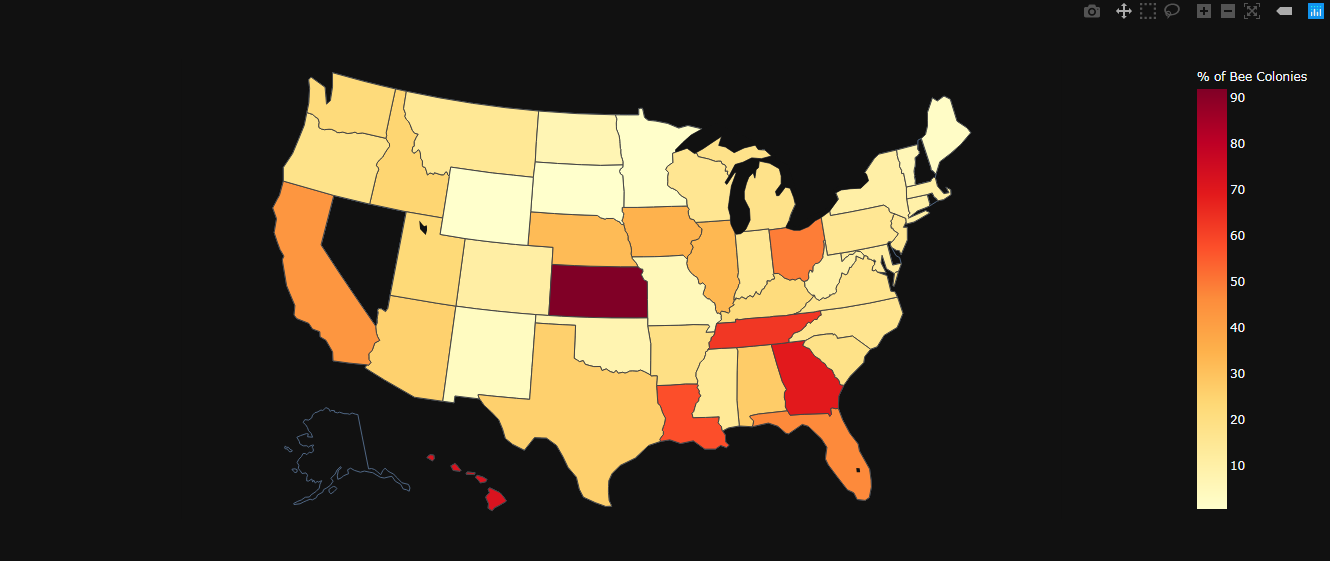

In [82]:
# Above code produces image as below
from IPython.display import Image
Image(filename='pylotlyexpress.jpg')